# WITH EPOCHS=20

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 263us/step - loss: 2.6917 - accuracy: 0.5302 - val_loss: 1.7359 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.4048 - accuracy: 0.7120 - val_loss: 1.2895 - val_accuracy: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.0241 - accuracy: 0.7853 - val_loss: 1.1138 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.8029 - accuracy: 0.8345 - val_loss: 0.9963 - val_accuracy: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.6396 - accuracy: 0.8673 - val_loss: 0.9552 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.5115 - accuracy: 0.8931 - val_loss: 0.9180 - val_accuracy: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - los

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

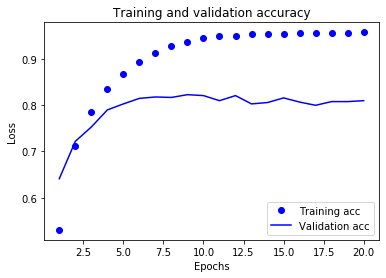

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

# WITH EPOCHS=9

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 151us/step - loss: 2.5434 - accuracy: 0.5254 - val_loss: 1.7105 - val_accuracy: 0.6400
Epoch 2/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.3886 - accuracy: 0.7050 - val_loss: 1.2875 - val_accuracy: 0.7090
Epoch 3/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.0377 - accuracy: 0.7720 - val_loss: 1.1229 - val_accuracy: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.8182 - accuracy: 0.8271 - val_loss: 1.0367 - val_accuracy: 0.7720
Epoch 5/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.6534 - accuracy: 0.8602 - val_loss: 0.9728 - val_accuracy: 0.7750
Epoch 6/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.5249 - accuracy: 0.8869 - val_loss: 0.9258 - val_accuracy: 0.8000
Epoch 7/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.424

In [20]:
print(results)

[1.0078869589927042, 0.7818343639373779]


In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0000002

In [26]:
print(type(predictions[0]))

<class 'numpy.ndarray'>


In [27]:
np.argmax(predictions[0])

3